In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

In [11]:
df_rwanda = pd.read_csv('./data/rwanda.csv')
df_rwanda.head()

,cluster,latitude,longitude,wealth_index,mean_light,median_light,std_light,min_light,max_light
0,1,-2.532818,29.684726,-0.531405,0.06,0.0,0.596992,0.0,6.0
1,2,-1.833858,30.310689,-0.409830,0.00,0.0,0.000000,0.0,0.0
2,3,-1.888155,29.478298,-0.478115,0.00,0.0,0.000000,0.0,0.0
3,4,-2.366763,30.521692,-0.435960,0.00,0.0,0.000000,0.0,0.0
4,5,-2.171266,30.018541,-0.449480,0.00,0.0,0.000000,0.0,0.0


In [90]:
X = df_rwanda[['latitude', 'longitude']].values.reshape((-1, 2))
y = df_rwanda['wealth_index'].values.reshape((-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [91]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(random_state=42).fit(X_train, y_train)

In [92]:
gpr.score(X_test, y_test)

0.5378467083726831

In [94]:
Z = gpr.predict(X_test)

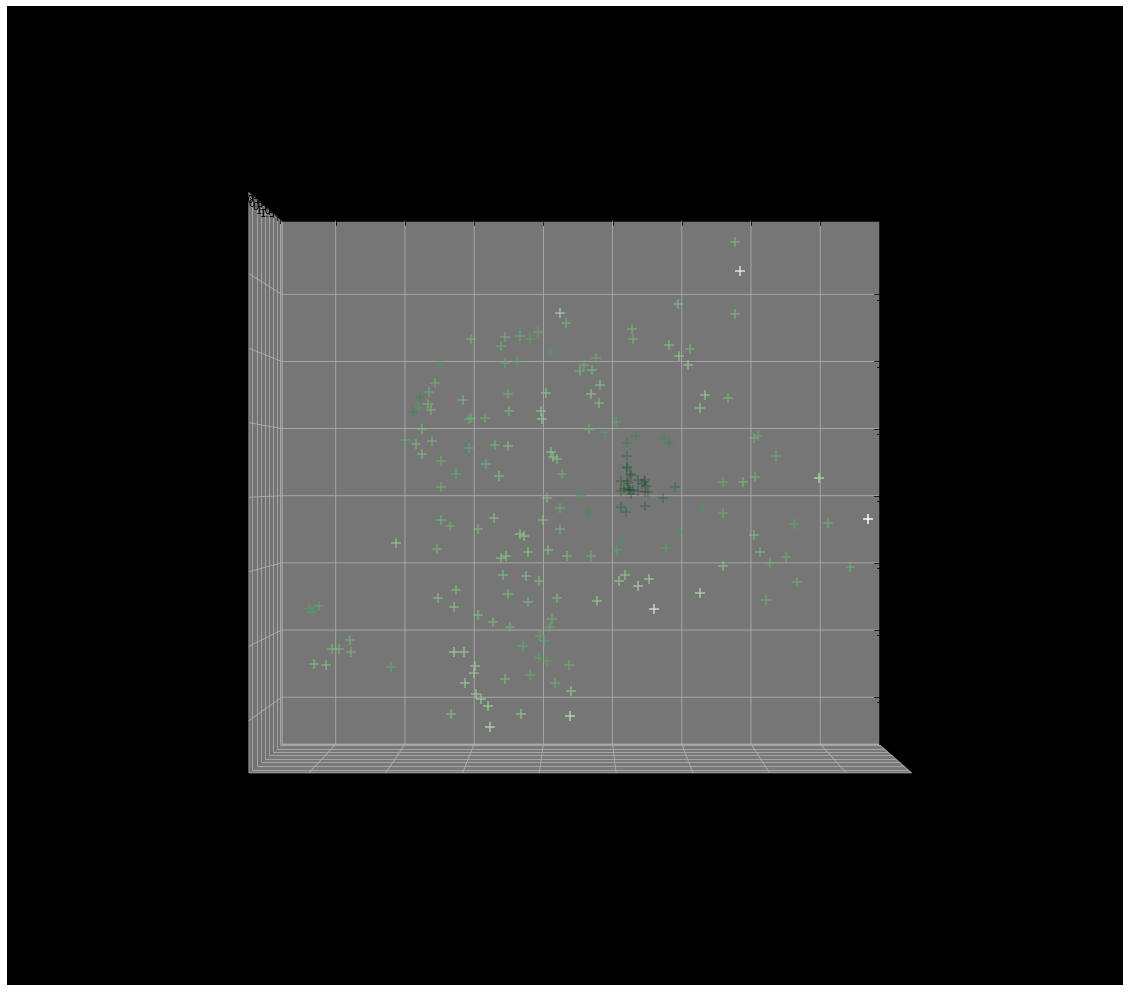

In [95]:
fig = plt.figure(figsize=(20, 18))
ax = fig.gca(projection='3d')
ax.view_init(-90, 0)
ax.set_facecolor('black')
lat, long = X_test[:,0], X_test[:,1]
Z = Z[:,0]
ax.scatter3D(lat, long, Z, c=Z, cmap='Greens', s=100, marker='+')

In [96]:
lat.min(), lat.max(), long.min(), long.max()

(-2.800865, -1.0993469999999999, 28.941822, 30.824889000000002)

In [121]:
tmp_lat = np.linspace(-2.80, -1.09, 100)
tmp_long = np.linspace(28.9, 30.8, 100)
uu, vv = np.meshgrid(tmp_lat, tmp_long)
uu = uu.ravel()
vv = vv.ravel()
tmp = np.concatenate([uu.reshape((-1, 1)), vv.reshape((-1, 1))], axis=1)

In [122]:
tmp.shape

(10000, 2)

In [123]:
Z = gpr.predict(tmp)

In [124]:
Z[:,0].shape

(10000,)

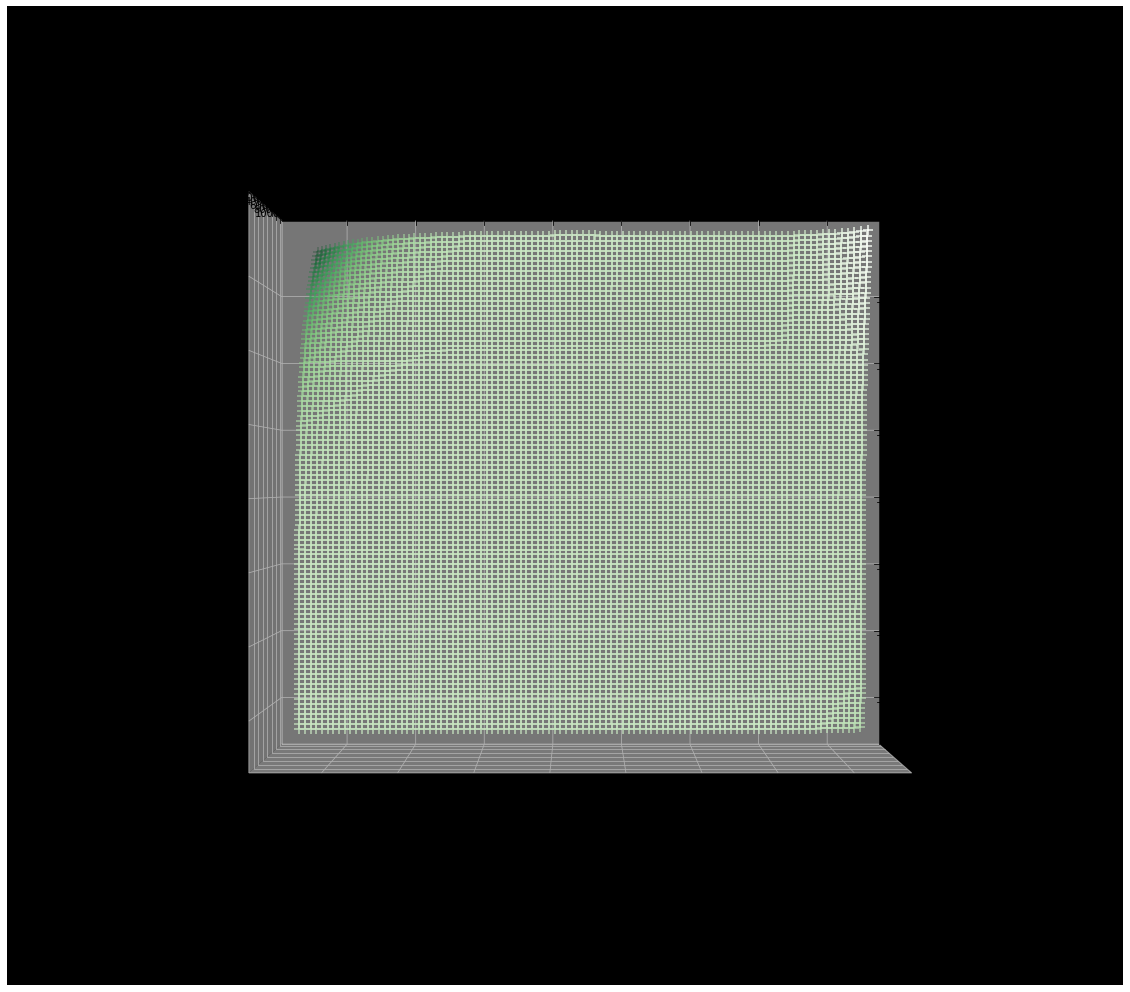

In [125]:
fig = plt.figure(figsize=(20, 18))
ax = fig.gca(projection='3d')
ax.view_init(-90, 0)
ax.set_facecolor('black')
ax.scatter3D(uu, vv, Z[:,0], c=Z[:,0], cmap='Greens', s=100, marker='+')